# <center>
<img src="../../img/ods_stickers.jpg" />
     
## [mlcourse.ai](mlcourse.ai), open Machine Learning course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), Gleb Filatov, and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Topic 3. Classification, Decision Trees and k Nearest Neighbors

## Article outline

1. Introduction
2. Decision Tree
3. Nearest Neighbors Method
4. Choosing Model Parameters and Cross-Validation
5. Application Examples and Complex Cases
6. Pros and Cons of Decision Trees and the Nearest Neighbors Method
7. Useful resources

## 1. Introduction

Before we dive into the material for this week's article, let's talk about the kind of problem that we are going to solve and its place in the exciting field of machine learning. T. Mitchell's book *Machine Learning* (1997) gives a classic, general definition of machine learning as follows: 

> A computer program is said to learn from experience *E* with respect to some class of tasks *T* and performance measure *P*, if its performance at tasks in *T*, as measured by *P*, improves with experience *E*.

In the various problem settings *T*, *P*, and *E* can refer to completely different things. Some of the most popular **tasks *T* in machine learning** are the following:

- classification of an instance to one of the categories based on its features;
- regression – prediction of a numerical target feature based on other features of an instance;
- clustering – identifying partitions of instances based on the features of these instances so that the members within the groups are more similar to each other than those in the other groups;
- anomaly detection – search for instances that are "greatly dissimilar" to the rest of the sample or to some group of instances;
- and so many more.

A good overview is provided in the "Machine Learning basics" chapter of ["Deep Learning"](http://www.deeplearningbook.org) (by Ian Goodfellow, Yoshua Bengio, Aaron Courville, 2016).

**Experience *E* ** refers to data (we can't go anywhere without it). Machine learning algorithms can be divided into those that are trained in *supervised* or *unsupervised* manner. In unsupervised learning tasks, one has a *set* consisting of *instances* described by a set of *features*. In supervised learning problems, there's also a *target variable*, which is what we would like to be able to predict, known for each instance in a *training set*. 

#### Example
Classification and regression are supervised learning problems. For example, as a credit institution, we may want to predict loan defaults based on the data accumulated about our clients. Here, the experience *E* is the available training data: a set of *instances* (clients), a collection of *features* (such as age, salary, type of loan, past loan defaults, etc.) for each, and a *target variable* (whether they defaulted on the loan). This target variable is just a fact of loan default (1 or 0), so recall that this is a (binary) classification problem. If you were instead predicting *by how much time* the loan payment is overdue, this would become a regression problem.
 
Finally, the third term used in the definition of machine learning is a **metric of the algorithm's performance evaluation *P*.** Such metrics differ for various problems and algorithms, and we'll discuss them as we study new algorithms. For now, we'll refer to a simple metric for classification algorithms, the proportion of correct answers – *accuracy* – on the test set.
 
Let's take a look at two supervised learning problems: classification and regression.


## 2. Decision Tree 
We begin our overview of classification and regression methods with one of the most popular ones – a decision tree. Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees. For example, Higher School of Economics publishes information diagrams to make the lives of its employees easier. Here is a snippet of instructions for publishing a paper on the Institution portal.

<img align='center' src='../../img/topic3_hse_instruction.png'><br>

In terms of machine learning, one can see it as a simple classifier that determines the appropriate form of publication (book, article, chapter of the book, preprint, publication in the "Higher School of Economics and the Media") based on the content (book, pamphlet, paper), type of journal, original publication type (scientific journal, proceedings), etc.
 
A decision tree is often a generalization of the experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively (or empirically) derived rules that could be represented as a decision tree.

<img src="../../img/credit_scoring_toy_tree_english.png" align='center'><br>

In our next case, we solve a binary classification problem (approve/deny a loan) on the grounds of "Age", "Home-ownership", "Income" and "Education".
 
The decision tree as a machine learning algorithm is essentially the same thing as the diagram shown above; we incorporate a stream of logical rules of the form "feature $a$ value is less than $x$ and feature $b$ value is less than $y$ ... => Category 1" into a tree-like data structure. The advantage of this algorithm is that they are easily interpretable. For example, using the above scheme, the bank can explain to the client why they were denied for a loan: e.g the client does not own a house and her income is less than 5,000.

As we'll see later, many other models, although more accurate, do not have this property and can be regarded as more of a "black box" approach, where it is harder to interpret how the input data was transformed into the output. Due to this "understandability" and similarity to human decision-making (you can easily explain your model to your boss), decision trees have gained immense popularity. C4.5, a representative of this group of classification methods, is even the first in the list of 10 best data mining algorithms ("Top 10 Algorithms in Data Mining", Knowledge and Information Systems, 2008. [PDF](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf)).

### How to Build a Decision Tree

Earlier, we saw that the decision to grant a loan is made based on age, assets, income, and other variables. But what variable to look at first? Let's discuss a simple example where all the variables are binary.
 
Recall the game of "20 Questions", which is often referenced when introducing decision trees. You've probably played this game -- one person thinks of a celebrity while the other tries to guess by asking only "Yes" or "No" questions. What question will the guesser ask first? Of course, they will ask the one that narrows down the number of the remaining options the most. Asking "Is it Angelina Jolie?" would, in the case of a negative response, leave all but one celebrity in the realm of possibility. In contrast, asking "Is the celebrity a woman?" would reduce the possibilities to roughly half. That is to say, the "gender" feature separates the celebrity dataset much better than other features like "Angelina Jolie", "Spanish", or "loves football." This reasoning corresponds to the concept of information gain based on entropy.

#### Entropy
Shannon's entropy is defined for a system with N possible states as follows:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

where $p_i$ is the probability of finding the system in the $i$-th state. This is a very important concept used in physics, information theory, and other areas. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This will help us formalize "effective data splitting", which we alluded to in the context of "20 Questions".

#### Toy Example
To illustrate how entropy can help us identify good features for building a decision tree, let's look at a toy example. We will predict the color of the ball based on its position.

<img align='center' src='../../img/decision_tree3.png'><br>

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img align='center' src='../../img/topic3_entropy_balls2.png'><br>


The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

It turns out that dividing the balls into two groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue to divide them into groups until the balls in each group are all of the same color.

<img align='center' src='../../img/topic3_credit_scoring_entropy.png'><br>

For the right group, we can easily see that we only need one extra partition using "coordinate less than or equal to 18". But, for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

We have successfully constructed a decision tree that predicts ball color based on its position. This decision tree may not work well if we add any balls because it has perfectly fit to the training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer "questions" or splits would be more accurate, even if it does not perfectly fit the training set. We will discuss the problem of overfitting later. 

### Tree-building Algorithm

We can make sure that the tree built in the previous example is optimal: it took only 5 "questions" (conditioned on the variable $x$) to perfectly fit a decision tree to the training set. Under other split conditions, the resulting tree would be deeper, i.e. take more "questions" to reach an answer.
 
At the heart of the popular algorithms for decision tree construction, such as ID3 or C4.5, lies the principle of greedy maximization of information gain: at each step, the algorithm chooses the variable that gives the greatest information gain upon splitting. Then the procedure is repeated recursively until the entropy is zero (or some small value to account for overfitting). Different algorithms use different heuristics for "early stopping" or "cut-off" to avoid constructing an overfitted tree. 

```python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
```

### Other Quality Criteria for Splits in Classification Problems

We discussed how entropy allows us to formalize partitions in a tree. But this is only one heuristic; there exists others:

- Gini uncertainty (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$. Maximizing this criterion can be interpreted as the maximization of the number of pairs of objects of the same class that are in the same subtree (not to be confused with the Gini index).
- Misclassification error:  $E = 1 - \max\limits_k p_k$

In practice, misclassification error is almost never used, and Gini uncertainty and information gain work similarly.
 
For binary classification, entropy and Gini uncertainty take the following form:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

where ($p_+$ is the probability of an object having a label +).

If we plot these two functions against the argument $p_+$, we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

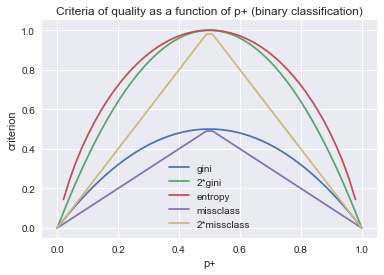

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

#### Example
Let's consider fitting a decision tree to some synthetic data. We will generate samples from two classes, both normal distributions but with different means.

In [3]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Let's plot the data. Informally, the classification problem in this case is to build some "good" boundary separating the two classes (the red dots from the yellow). Machine learning for this case boils down to choosing a good separating border. A straight line will be too simple while some complex curve snaking by each red dot will be too complex and will lead us to making mistakes on new samples. Intuitively, some smooth boundary, or at least a straight line or a hyperplane, would work well on new data.

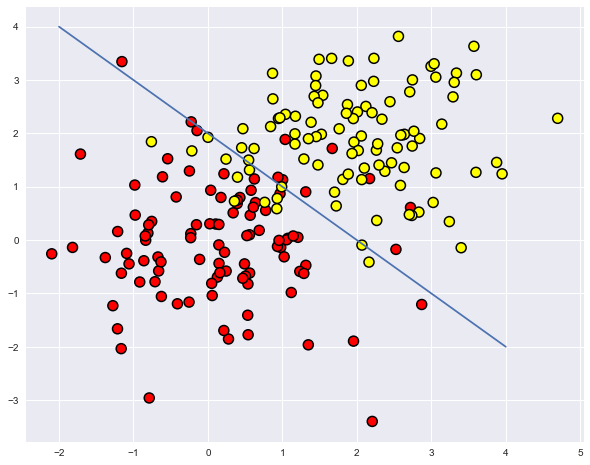

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Let's try to separate these two classes by training an `Sklearn` decision tree. We will use `max_depth` parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

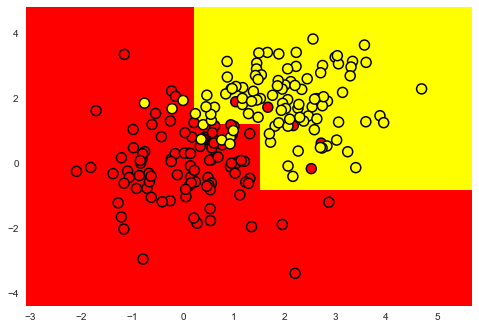

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

In [6]:
# use .dot format to visualize a tree
from ipywidgets import Image
from io import StringIO
import pydotplus #
%pip install pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())


The following command must be run outside of the IPython shell:

    $ pip install pydotplus

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


<img src='../../img/topic3_eng_dtree_structure.png'>

#### How can we "read" such a tree?
 
In the beginning, there were 200 samples (instances), 100 of each class. The entropy of the initial state was maximal, $S=1$. Then, the first partition of the samples into 2 groups was made by comparing the value of $x_2$ with $1.211$ (find this part of the border in the picture above). With that, the entropy of both left and right groups decreased. The process continues up to depth 3. In this visualization, the more samples of the first class, the darker the orange color of the vertex; the more samples of the second class, the darker the blue. At the beginning, the number of samples from two classes is equal, so the root node of the tree is white.

### How a Decision Tree Works with Numerical Features

Suppose we have a numeric feature "Age" that has a lot of unique values. A decision tree will look for the best (according to some criterion of information gain) split by checking binary attributes such as "Age <17", "Age < 22.87", and so on. But what if the age range is large? Or what if another quantitative variable, "salary", can also be "cut" in many ways? There will be too many binary attributes to select from at each step during tree construction. To resolve this problem, heuristics are usually used to limit the number of thresholds to which we compare the quantitative variable.
 
Let's consider an example. Suppose we have the following dataset:

In [7]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Let's sort it by age in ascending order.

In [8]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [9]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

dot_data = StringIO()
export_graphviz(age_tree, feature_names=['Age'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

We see that the tree used the following 5 values to evaluate by age: 43.5, 19, 22.5, 30, and 32 years. If you look closely, these are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1. To illustrate further, 43.5 is the average of 38 and 49 years; a 38-year-old customer failed to return the loan whereas the 49-year-old did. The tree looks for the values at which the target class switches its value as a threshold for "cutting" a quantitative variable.
 
Given this information, why do you think it makes no sense here to consider a feature like "Age <17.5"?

Let's consider a more complex example by adding the "Salary" variable (in the thousands of dollars per year).

In [10]:
data2 = pd.DataFrame({'Age':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Salary': [25,80,22,36,37,59,74,70,33,102,88], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data2

,Age,Loan Default,Salary
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102



If we sort by age, the target class ( "loan default") switches (from 1 to 0 or vice versa) 5 times. And if we sort by salary, it switches 7 times. How will the tree choose features now? Let's see.


In [11]:
data2.sort_values('Age')

,Age,Loan Default,Salary
0,17,1,25
2,18,1,22
3,20,0,36
7,25,1,70
8,29,1,33
9,31,0,102
10,33,1,88
4,38,1,37
5,49,0,59
6,55,0,74


In [12]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

In [13]:
dot_data = StringIO()
export_graphviz(age_sal_tree, feature_names=['Age', 'Salary'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

We see that the tree partitioned by both salary and age. Moreover, the thresholds for feature comparisons are 43.5 and 22.5 years of age and 95k and 30.5k per year. Again, we see that 95 is the average between 88 and 102; the individual with a salary of 88k proved to be "bad" while the one with 102k was "good". The same goes for 30.5k. That is, only a few values for comparisons by age and salary were searched. Why did the tree choose these features? Because they gave better partitioning (according to Gini uncertainty). 

**Conclusion**: the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.

Furthermore, when there are a lot of numeric features in a dataset, each with a lot of unique values, only the top-N of the thresholds described above are selected, i.e. only use the top-N that give maximum gain. The process is to construct a tree of depth 1, compute the entropy (or Gini uncertainty), and select the best thresholds for comparison.

To illustrate, if we split by "Salary $\leq$ 34.5", the left subgroup will have an entropy of 0 (all clients are "bad"), and the right one will have an entropy of 0.954 (3 "bad" and 5 "good", you can check this yourself as it will be part of the assignment). The information gain is roughly 0.3.
If we split by "Salary $\leq$ 95", the left subgroup will have the entropy of 0.97 (6 "bad" and 4 "good"), and the right one will have the entropy of 0 (a group containing only one object). The information gain is about 0.11.
If we calculate information gain for each partition in that manner, we can select the thresholds for comparison of each numeric feature before the construction of a large tree (using all features).

More examples of numeric feature discretization can be found in posts like [this](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) or [this](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). One of the most prominent scientific papers on this subject is "On the handling of continuous-valued attributes in decision tree generation" (UM Fayyad. KB Irani, "Machine Learning", 1992).

### Crucial Tree Parameters

Technically, you can build a decision tree until each leaf has exactly one instance, but this is not common in practice when building a single tree because it will be *overfitted*, or too tuned to the training set, and will not predict labels for new data well. At the bottom of the tree, at some great depth, there will be partitions on less important features (e.g. whether a client came from Leeds or New York). We can exaggerate this story further and find that all four clients who came to the bank for a loan in green trousers did not return the loan. Even if that were true in training, we do not want our classification model to generate such specific rules.
 
There are two exceptions where the trees are built to the maximum depth:
- Random Forest (a group of trees) averages the responses from individual trees that are built to the maximum depth (we will talk later on why you should do this)
- *Pruning* trees. In this approach, the tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using *cross-validation*, more on this below).

The picture below is an example of a dividing border built in an overfitted tree. 


<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

The most common ways to deal with overfitting in decision trees are as follows:
- artificial limitation of the depth or a minimum number of samples in the leaves: the construction of a tree just stops at some point;
- pruning the tree.

### Class DecisionTreeClassifier in Scikit-learn
The main parameters of the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class are:

- `max_depth` – the maximum depth of the tree;
- `max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for *all* features);
- `min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of *cross-validation*, more on this below.

### Decision Tree in a Regression Problem

When predicting a numeric variable, the idea of a tree construction remains the same, but the quality criteria changes: 

- Variance around the mean: 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2, $$

where $\ell$ is the number of samples in a leaf, $y_i$ is the value of the target variable. Simply put, by minimizing the variance around the mean, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

#### Example
Let's generate some data distributed by the function $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ with some noise. Then we will train a tree on it and show what predictions it makes.

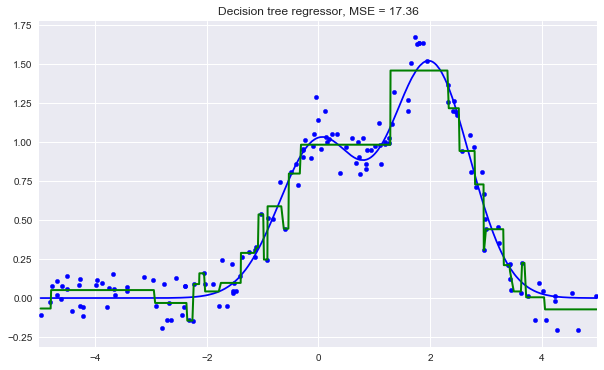

In [14]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

We see that the decision tree approximates the data with a piecewise constant function.

## 3. Nearest Neighbors Method

*The nearest neighbors method* (k-Nearest Neighbors, or k-NN) is another very popular classification method that is also sometimes used in regression problems. This, like decision trees, is one of the most comprehensible approaches to classification. The underlying intuition is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

According to the nearest neighbors method, the green ball would be classified as "blue" rather than "red".

<img src='../../img/kNN.png' align='center'><br>

For another example, if you do not know how to tag a Bluetooth-headset on an online listing, you can find 5 similar headsets, and, if 4 of them are tagged as "accessories" and only 1 as "Technology", then you will also  label it under "accessories".
 
To classify each sample from the test set, one needs to perform the following operations in order:
1. Calculate the distance to each of the samples in the training set.
2. Select $k$ samples from the training set with the minimal distance to them.
3. The class of the test sample will be the most frequent class among those $k$ nearest neighbors.

The method adapts quite easily for the regression problem: on step 3, it returns not the class, but the number – a mean (or median) of the target variable among neighbors.
 
A notable feature of this approach is its laziness – calculations are only done during the prediction phase, when a test sample needs to be classified. No model is constructed from the training examples beforehand. In contrast, recall that for decision trees in the first half of this article the tree is constructed based on the training set, and the classification of test cases occurs relatively quickly by traversing through the tree.
 
Nearest neighbors is a well-studied approach. There exist many important theorems claiming that, on "endless" datasets, it is the optimal method of classification. The authors of the classic book "The Elements of Statistical Learning" consider k-NN to be a theoretically ideal algorithm which usage is only limited by computation power and the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). 

### Nearest Neighbors Method in Real Applications
- k-NN can serve as a good starting point (baseline) in some cases;
- In Kaggle competitions, k-NN is often used for the construction of meta-features (i.e. k-NN predictions as input to other models) or for stacking/blending;
- The nearest neighbors method extends to other tasks like recommendation systems. The initial decision could be a recommendation of a product (or service) that is popular among the *closest neighbors* of the person for whom we want to make a recommendation;
- In practice, on large datasets, approximate methods of search are often used for nearest neighbors. There is a number of open source libraries that implement such algorithms; check out Spotify's library [Annoy](https://github.com/spotify/annoy).

The quality of classification/regression with k-NN depends on several parameters:

- The number of neighbors $k$.
- The distance measure between samples (common ones include Hamming, Euclidean, cosine, and Minkowski distances). Note that most of these metrics require data to be scaled. Simply speaking, we do not want the "salary" feature, which is on the order of thousands, to affect the distance more than "age", which is generally less than 100. 
- Weights of neighbors (each neighbor may contribute different weights; for example, the further the sample, the lower the weight).

### Class `KNeighborsClassifier` in Scikit-learn
The main parameters of the class `sklearn.neighbors.KNeighborsClassifier` are:
- weights: `uniform` (all weights are equal), `distance` (the weight is inversely proportional to the distance from the test sample), or any other user-defined function;
- algorithm (optional): `brute`, `ball_tree `, `KD_tree`, or `auto`. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to `auto`, the right way to find the neighbors will be automatically chosen based on the training set.
- leaf_size (optional): threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;
- metric: `minkowski`, `manhattan `, `euclidean`, `chebyshev`, or other.

## 4. Choosing Model Parameters and Cross-Validation 

The main task of learning algorithms is to be able to *generalize* to unseen data. Since we cannot immediately check the model performance on new, incoming data (because we do not know the true values of the target variable yet), it is necessary to sacrifice a small portion of the data to check the quality of the model on it.


This is often done in one of two ways:
- setting aside a part of the dataset (*held-out/hold-out set*). Thus we reserve a fraction of the training set (typically from 20% to 40%), train the model on the remaining data (60-80% of the original set), and compute performance metrics for the model (e.g accuracy) on the hold-out set.
- *cross-validation*. The most frequent case here is *k-fold cross-validation*.

<img align='center' src='../../img/cross_validation.png'><br>

In k-fold cross-validation, the model is trained $K$ times on different ($K-1$) subsets of the original dataset (in white) and checked on the remaining subset (each time a different one, shown above in orange).
We obtain $K$ model quality assessments that are usually averaged to give an overall average quality of classification/regression.

Cross-validation provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.
 
Cross-validation is a very important technique in machine learning and can also be applied in statistics and econometrics. It helps with hyperparameter tuning, model comparison, feature evaluation, etc. More details can be found [here](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) (blog post by Sebastian Raschka) or in any classic textbook on machine (statistical) learning.

## 5. Application Examples and Complex Cases

### Decision trees and nearest neighbors method in a customer churn prediction task 

Let's read data into a `DataFrame` and preprocess it. Store *State* in a separate `Series` object for now and remove it from the dataframe. We will
 train the first model without the *State* feature, and then we will see if it helps. 

In [54]:
df = pd.read_csv('../../data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [16]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Let's allocate 70% of the set for training (`X_train`, `y_train`) and 30% for the hold-out set (`X_holdout`, `y_holdout`). The hold-out set will not be involved in tuning the parameters of the models. We'll use it at the end, after tuning, to assess the quality of the resulting model. Let's train 2 models: decision tree and k-NN. We do not know what parameters are good, so we will assume some random ones: a tree depth of 5 and the number of nearest neighbors equal 10.

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Let's assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy). The decision tree did better: the percentage of correct answers is about 94% (decision tree) versus 88% (k-NN). Note that this performance is achieved by using random parameters.

In [18]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.94

In [19]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) # 0.88

0.881

Now, let's identify the parameters for the tree using cross-validation. We'll tune the maximum depth and the maximum number of features used at each split. Here is the essence of how the GridSearchCV works: for each unique pair of values of `max_depth` and `max_features`, compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Let's list the best parameters and the corresponding mean accuracy from cross-validation.

In [21]:
tree_grid.best_params_#{'max_depth': 6, 'max_features': 17}

{'max_depth': 6, 'max_features': 17}

In [22]:
tree_grid.best_score_ #0.94256322331761677

0.9425632233176168

In [23]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) #0.94599999999999995

0.946

Let's draw the resulting tree. Due to the fact that it is not entirely a toy example (its maximum depth is 6), the picture is not that small, but you can "walk" over the tree if you click on the picture.

In [24]:
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Now, let's tune the number of neighbors $k$ for k-NN:

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.3s finished


({'knn__n_neighbors': 7}, 0.8859837119588513)

In [26]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

Here, the tree proved to be better than the nearest neighbors algorithm: 94.2%/96.6% accuracy for cross-validation and hold-out respectively. Decision trees perform very well, and even random forest (let's think of it for now as a bunch of trees that work better together) in this example cannot achieve better performance (95.1%/95.3%) despite being trained for much longer. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9494233119813256


In [28]:
forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.8min finished


({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [29]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.953

### Complex Case for Decision Trees

To continue the discussion of the pros and cons of the methods in question, let's consider a simple classification task, where a tree would perform well but does it in an "overly complicated" manner. Let's create a set of points on a plane (2 features), each point will be one of two classes (+1 for red, or -1 for yellow). If you look at it as a classification problem, it seems very simple: the classes are separated by a line. 

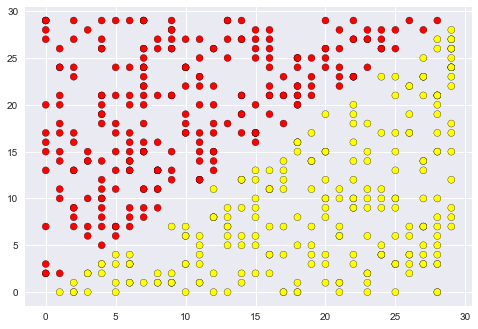

In [30]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

However, the border that the decision tree builds is too complicated; plus the tree itself is very deep. Also, imagine how badly the tree will generalize to the space beyond the $30 \times 30$ squares that frame the training set.

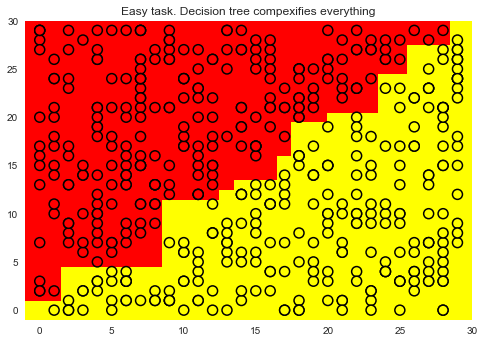

In [31]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

We got this overly complex construction, although the solution is just a straight line $x_1 = x_2$.

In [32]:
dot_data = StringIO()
export_graphviz(tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

The method of one nearest neighbor does better than the tree but is still not as good as a linear classifier (our next topic).

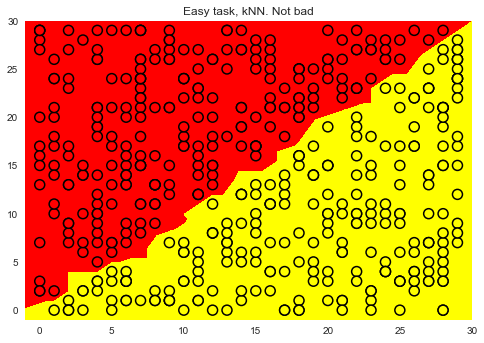

In [33]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

###  Decision Trees and k-NN in a Task of MNIST Handwritten Digits Recognition

Now let's have a look at how these 2 algorithms perform on a real-world task. We will use the `sklearn` built-in dataset on handwritten digits. This task is an example where k-NN works surprisingly well.
 
Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is ​​"unfolded" into a vector of length 64, and we obtain a feature description of an object.
 
Let's draw some handwritten digits. We see that they are distinguishable.

In [34]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

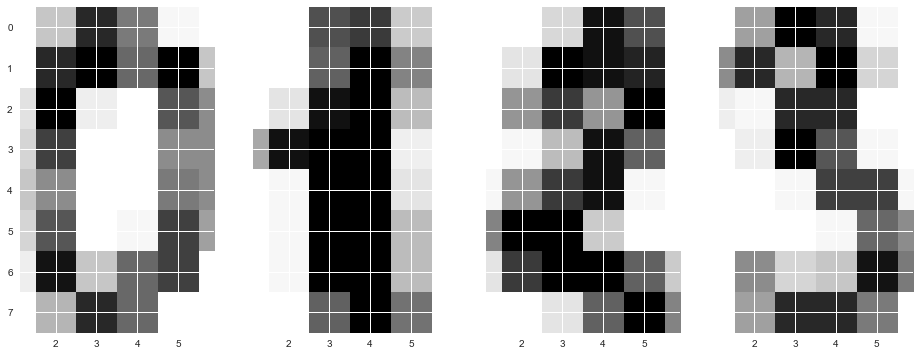

In [35]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

Next, let's do the same experiment as in the previous task, but, this time, let's change the ranges for tunable parameters.

Let’s select 70% of the dataset for training (`X_train`, `y_train`) and 30% for holdout (`X_holdout`, `y_holdout`). The holdout set will not participate in model parameters tuning; we will use it at the end to check the quality of the resulting model.

In [36]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

Let’s train a decision tree and k-NN with our random parameters.

In [37]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Now let’s make predictions on our holdout set. We can see that k-NN did much better, but note that this is with random parameters.  

In [38]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.97, 0.666)

(0.9740740740740741, 0.6666666666666666)

Now let’s tune our model parameters using cross-validation as before, but now we’ll take into account that we have more features than in the previous task: 64. 

In [39]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)


Let's see the best parameters combination and the corresponding accuracy from cross-validation:



In [40]:
tree_grid.best_params_, tree_grid.best_score_ # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

That has already passed 66% but not quite 97%. k-NN works better on this dataset. In the case of one nearest neighbour, we were able to reach 99% guesses on cross-validation.  

In [41]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) # 0.987

0.9865458422397149

Let’s train a random forest on the same dataset, it works better than k-NN on the majority of datasets. But we here have an exception. 

In [42]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) # 0.935

0.9349085619110404

You would be right to point out that we have not tuned any `RandomForestClassifier` parameters here. Even with tuning, the training accuracy doesn’t reach 98% as it did with one nearest neighbour.  

Results
*(Legend: CV and Holdout are average shares of the correct answers on cross-model validation and hold-out sample. DT stands for a decision tree, k-NN stands for k-nearest neighbors, RF stands for random forest).*

|     |   CV  | Holdout |  
| **DT**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |
| **RF**  | 0.935 |  0.941  | 

The **conclusion** of this experiment (and general advice): first check simple models on your data: decision tree and nearest neighbors (next time we will also add logistic regression to this list). It might be the case that these methods already work well enough.

### Complex Case for the Nearest Neighbors Method
Let's consider another simple example. In the classification problem, one of the features will just be proportional to the vector of responses, but this won't help for the nearest neighbors method.


In [43]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

As always, we will look at the accuracy for cross-validation and the hold-out set. Let's construct curves reflecting the dependence of these quantities on the `n_neighbors` parameter in the method of nearest neighbors. These curves are called validation curves.

One can see that k-NN with the Euclidean distance does not work well on the problem, even when you vary the number of nearest neighbors over a wide range. In contrast, the decision tree easily "detects" hidden dependencies in the data despite a restriction on the maximum depth.

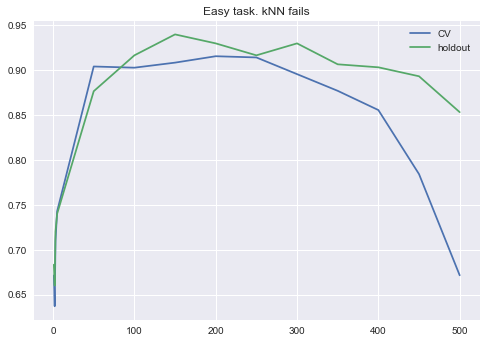

In [44]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [45]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


In the second example, the tree solved the problem perfectly while k-NN experienced difficulties. However, this is more of a disadvantage of using Euclidian distance than of the method. It did not allow us to reveal that one feature was much better than the others. 

## 6. Pros and Cons of Decision Trees and the Nearest Neighbors Method

### Decision trees

Pros:
- Generation of clear human-understandable classification rules, e.g. "if age <25 and is interested in motorcycles, deny the loan". This property is called interpretability of the model.
- Decision trees can be easily visualized, i.e. both the model itself (the tree) and prediction for a certain test object (a path in the tree) can "be interpreted".
- Fast training and forecasting.
- Small number of model parameters.
- Supports both numerical and categorical features.

Cons:
 
- The trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.
- Separating border built by a decision tree has its limitations – it consists of hyperplanes perpendicular to one of the coordinate axes, which is inferior in quality to some other methods, in practice.
- We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Note that overfitting is an issue for all machine learning methods.
- Instability. Small changes to the data can significantly change the decision tree. This problem is tackled with decision tree ensembles (discussed next time).
- The optimal decision tree search problem is NP-complete. Some heuristics are used in practice such as greedy search for a feature with maximum information gain, but it does not guarantee finding the globally optimal tree.
- Difficulties to support missing values in the data. Friedman estimated that it took about 50% of the code to support gaps in data in CART (an improved version of this algorithm is implemented in `sklearn`).
- The model can only interpolate but not extrapolate (the same is true for random forests and tree boosting). That is, a decision tree makes constant prediction for the objects that lie beyond the bounding box set by the training set in the feature space. In our example with the yellow and blue balls, it would mean that the model gives the same predictions for all balls with positions >19 or <0.

### The nearest neighbors method

Pros:
- Simple implementation;
- Well studied;
- Typically, the method is a good first solution not only for classification or regression, but also recommendations;
- It can be adapted to a certain problem by choosing the right metrics or kernel (in a nutshell, the kernel may set the similarity operation for complex objects such as graphs while keeping the k-NN approach the same). By the way, [Alexander Dyakonov](https://www.kaggle.com/dyakonov), a former top-1 kaggler, loves the simplest k-NN but with the tuned object similarity metric;
- Good interpretability. There are exceptions: if the number of neighbors is large, the interpretability deteriorates ("We did not give him a loan, because he is similar to the 350 clients, of which 70 are the bad, and that is 12% higher than the average for the dataset").

Cons:
- Method considered fast in comparison with compositions of algorithms, but the number of neighbors used for classification is usually large (100-150) in real life, in which case the algorithm will not operate as fast as a decision tree.
- If a dataset has many variables, it is difficult to find the right weights and to determine which features are not important for classification/regression.
- Dependency on the selected distance metric between the objects. Selecting the Euclidean distance by default is often unfounded. You can find a good solution by grid searching over parameters, but this becomes very time consuming for large datasets.
- There are no theoretical ways to choose the number of neighbors – only grid search (though this is often true for all hyperparameters of all models). In the case of a small number of neighbors, the method is sensitive to outliers, that is, it is inclined to overfit.
- As a rule, it does not work well when there are a lot of features due to the "curse of dimensionality". Professor Pedro Domingos, a well-known member in the ML community, talks about it [here](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) in his popular paper, "A Few Useful Things to Know about Machine Learning"; also "the curse of dimensionality" is described in the Deep Learning book in [this chapter](http://www.deeplearningbook.org/contents/ml.html).

This is a lot of information, but, hopefully, this article will be a great reference for you for a long time :)

## 7. Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd) based on this notebook
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/322534/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/p9Hny3Cs6rk) on YouTube
- Decision trees and k Nearest Neighbors are covered practically in every ML book. We recommend “Pattern Recognition and Machine Learning” (C. Bishop) and “Machine Learning: A Probabilistic Perspective” (K. Murphy).
- The book “Machine Learning in Action” (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Good to search for decision trees and k-NN.